## TASK 2: Prediction Using Unsupervised ML

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.shape

(150, 6)

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Checking for null values


In [8]:
df.isnull().sum().sort_values(ascending= True) 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No Null values found 

In [9]:
df.duplicated().sum()

0

No duplicates found 

Setting the id as index 

In [10]:
df= df.set_index('Id')

In [11]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


**EXPLORATORY DATA ANALYSIS**

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

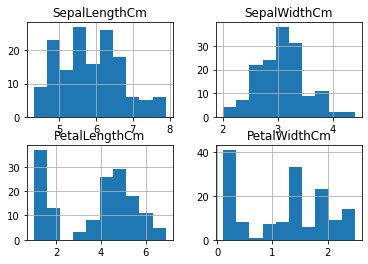

In [20]:
df[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']].hist()

SCATTER PLOT

Text(0, 0.5, 'Width')

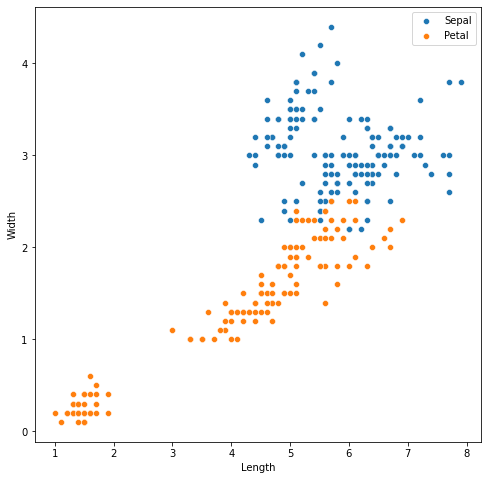

In [23]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='SepalLengthCm', y ='SepalWidthCm', data=df, label='Sepal')
sns.scatterplot(x='PetalLengthCm', y ='PetalWidthCm', data=df, label='Petal')
plt.xlabel('Length')
plt.ylabel('Width')

FINDING CORRELATION

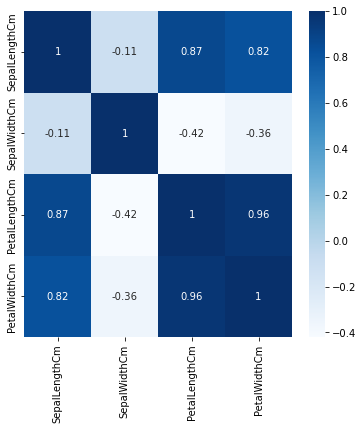

In [24]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), cmap='Blues',annot = True)
plt.show()

PAIRPLOT

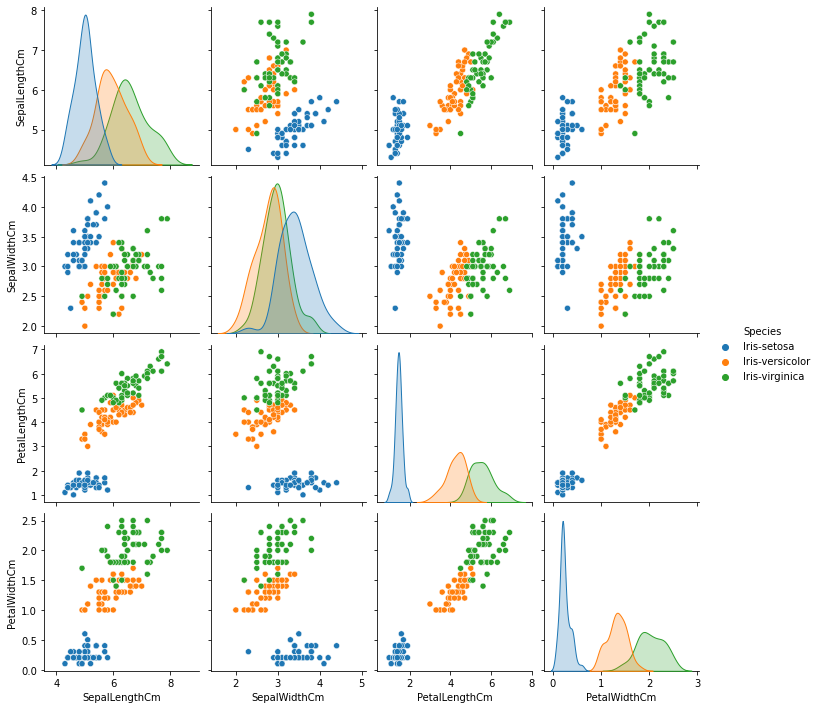

In [26]:
sns.pairplot(df, hue='Species')
plt.show()

ELBOW METHOD

In [27]:
from sklearn.cluster import KMeans

x = df.iloc[:, [0, 1, 2, 3]].values

sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of Squared Error')

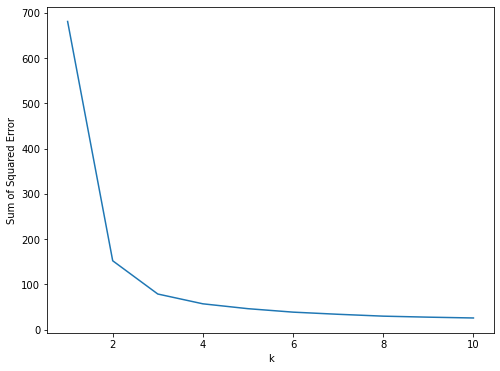

In [28]:
fig = plt.figure(1, figsize=(8, 6))
plt.plot(k_rng, sse)
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')

PREDICTIVE MODELING

In [29]:
km = KMeans(n_clusters=3)
km_pred = km.fit_predict(x)
km_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [30]:
km.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [31]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df['cluster'] = km_pred

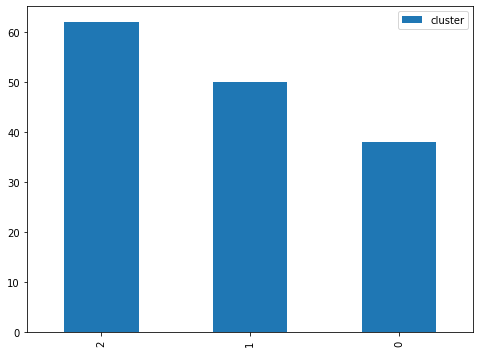

In [33]:
fig = plt.figure(1, figsize=(8, 6))
df['cluster'].value_counts().plot(kind='bar')
plt.legend()

FINAL PREDICTION

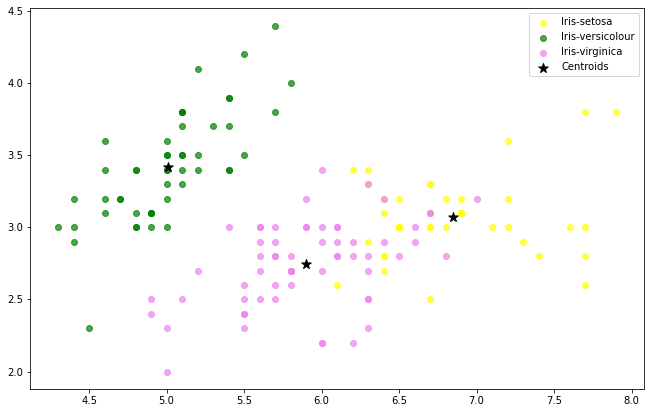

In [34]:
fig = plt.figure(1, figsize=(11, 7))
plt.scatter(x[km_pred == 0, 0], x[km_pred == 0, 1], alpha=0.7, label = 'Iris-setosa', color='yellow')
plt.scatter(x[km_pred == 1, 0], x[km_pred == 1, 1], alpha=0.7, label = 'Iris-versicolour', color='green')
plt.scatter(x[km_pred == 2, 0], x[km_pred == 2, 1], alpha=0.7, label = 'Iris-virginica', color='violet')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, marker='*', c='black', label = 'Centroids')

plt.legend()